In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('../data_export/books_cleaned.csv')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   name               2000 non-null   object 
 2   price              2000 non-null   int64  
 3   original_price     2000 non-null   int64  
 4   rating_average     2000 non-null   float64
 5   review_count       2000 non-null   int64  
 6   author             2000 non-null   object 
 7   quantity_sold      2000 non-null   int64  
 8   inventory_status   2000 non-null   object 
 9   Công ty phát hành  1909 non-null   object 
 10  Loại bìa           1700 non-null   object 
 11  Số trang           2000 non-null   object 
 12  Ngày xuất bản      1439 non-null   object 
 13  main_category      2000 non-null   object 
 14  sub_category_1     1999 non-null   object 
 15  sub_category_2     1883 non-null   object 
 16  sub_category_3     590 n

In [71]:
for col in df.columns:
  missing_data = df[col].isna().sum()
  if missing_data < 10000 and missing_data > 0:
   print(f'Cột {col} thiếu {missing_data} giá trị')

Cột Công ty phát hành thiếu 91 giá trị
Cột Loại bìa thiếu 300 giá trị
Cột Ngày xuất bản thiếu 561 giá trị
Cột sub_category_1 thiếu 1 giá trị
Cột sub_category_2 thiếu 117 giá trị
Cột sub_category_3 thiếu 1410 giá trị
Cột sub_category_4 thiếu 1998 giá trị


In [72]:
df['Công ty phát hành'].fillna('Không rõ', inplace=True)

C:\Users\CEO\AppData\Local\Temp\ipykernel_13188\2850199255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Công ty phát hành'].fillna('Không rõ', inplace=True)


In [73]:
df['Ngày xuất bản'] = pd.to_datetime(df['Ngày xuất bản'])

C:\Users\CEO\AppData\Local\Temp\ipykernel_13188\4058616995.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Ngày xuất bản'] = pd.to_datetime(df['Ngày xuất bản'])


In [74]:
pd.set_option('display.float_format', '{:.4f}'.format)
df.describe()

,id,price,original_price,rating_average,review_count,quantity_sold,Ngày xuất bản
count,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,1439
mean,185111728.3905,135341.9650,170582.5525,4.1016,136.9040,1367.5510,2022-01-30 18:02:45.114662656
min,342851.0000,2000.0000,2000.0000,0.0000,0.0000,0.0000,2010-07-21 00:00:00
25%,90587060.2500,76500.0000,98000.0000,4.7000,2.0000,40.0000,2020-11-01 12:00:00
50%,213716584.5000,113900.0000,145500.0000,5.0000,14.0000,180.5000,2022-05-05 00:00:00
75%,275855606.5000,159000.0000,199000.0000,5.0000,77.0000,792.0000,2023-12-21 00:00:00
max,277728224.0000,1497000.0000,1750000.0000,5.0000,5477.0000,62007.0000,2025-05-03 00:00:00
std,100491323.6743,108563.1663,131025.4731,1.7876,430.0313,4269.7271,NaN


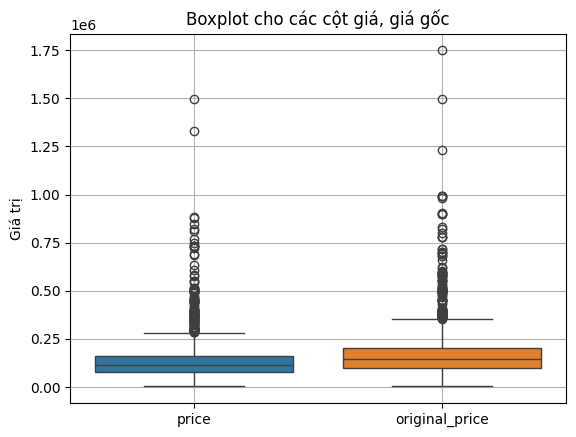

In [75]:
columns = ['price', 'original_price']
sns.boxplot(data=df[columns])

plt.title('Boxplot cho các cột giá, giá gốc')
plt.ylabel('Giá trị')
plt.grid(True)
plt.show()

In [76]:
#Tìm các giá trị outliers
#Tính IQR
Q1 = df['original_price'].quantile(0.25)
Q3 = df['original_price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = df[df['original_price'] > upper_bound]

In [77]:
outliers = df[df['original_price'] > upper_bound]
print(outliers[['name', 'price', 'original_price', 'quantity_sold']])

                                                   name   price  \
8     Combo 4 cuốn: ChatGPT + ChatGPT thực chiến + A...  608000   
42    Hành Lang Hẹp - Nhà Nước, Xã Hội Và Vận Mệnh C...  340000   
75                                 Suối Nguồn (Tái Bản)  289000   
80    (Tập Thơ) NGƯỜI LÀ MỘT BÓNG CHIM KHUÊ TÚ - Ngu...  385000   
95    COMBO 4 - (TRÍ TUỆ CỦA NGƯỜI XƯA - ĐẠO LÝ NGƯỜ...  495000   
...                                                 ...     ...   
1965               Combo 2 Tập The Stand - Stephen King  574560   
1980  [bìa cứng] [Sách lịch sử có tranh minh họa] TH...  450000   
1986  Tư Vấn Bảo Hiểm - Những Kỹ Năng Không Ai Nói V...  880000   
1989                                             Sụp Đổ  273000   
1993  Harry Potter Và Chiếc Cốc Lửa - Tập 4 (Bản Đặc...  882000   

      original_price  quantity_sold  
8             716000              1  
42            397000            302  
75            380000          13177  
80            385000            269  
95   

=> Đây là những combo sách hoặc sách bản đặc biệt nên giá cao hơn là hoàn toàn hợp lý.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   int64         
 1   name               2000 non-null   object        
 2   price              2000 non-null   int64         
 3   original_price     2000 non-null   int64         
 4   rating_average     2000 non-null   float64       
 5   review_count       2000 non-null   int64         
 6   author             2000 non-null   object        
 7   quantity_sold      2000 non-null   int64         
 8   inventory_status   2000 non-null   object        
 9   Công ty phát hành  2000 non-null   object        
 10  Loại bìa           1700 non-null   object        
 11  Số trang           2000 non-null   object        
 12  Ngày xuất bản      1439 non-null   datetime64[ns]
 13  main_category      2000 non-null   object        
 14  sub_cate

In [79]:
#Do có 1 vài cột bị xuống dòng hoặc dính khoảng trắng nên khi transform trong PBI nó sẽ bị lỗi => phải xóa 
df = df.replace({r'\n': ' ', r'\r': ' '}, regex=True)

In [80]:
df['Số trang'] = df['Số trang'].fillna(0)

In [81]:
#Chuyển số trang về int. Và thấy có 1 giá trị là string. Tiến hành sửa nó
#Tìm thằng không phải số
check = pd.to_numeric(df['Số trang'], errors='coerce')
df_invalid = df[check.isna()]
print(df_invalid)

             id                                               name   price  \
8     276346703  Combo 4 cuốn: ChatGPT + ChatGPT thực chiến + A...  608000   
9     276159943  NEXUS - Lược Sử Của Những Mạng Lưới Thông Tin ...  227500   
22    212597849                        Bookmark kẹp sách giấy cứng    6480   
23    209389165                        Bookmark kẹp sách giấy cứng    2000   
26    199582064  Sổ tay ghi chép / sổ lò xo ghi chép A5 - B5 - ...   50000   
...         ...                                                ...     ...   
1976  269028071  PHƯƠNG PHÁP HỌC TẬP CỦA SIMON - Cách học nhanh...  134250   
1981  186369313                    Hành Tinh Của Một Kẻ Nghĩ Nhiều   76000   
1986  100347068  Tư Vấn Bảo Hiểm - Những Kỹ Năng Không Ai Nói V...  880000   
1989   67865487                                             Sụp Đổ  273000   
1997   23436986  Kid's Box 2nd ed Activity Book with Online Res...  214700   

      original_price  rating_average  review_count             

In [82]:
df['Số trang'] = df['Số trang'].str.replace('tr', '')

In [105]:
df['Loại bìa'] = df['Loại bìa'].fillna('Không có')
df['Loại bìa'] = df['Loại bìa'].replace('Tùy chọn phiên bản bìa cứng hoặc bìa mềm', 'Tùy chọn')

In [83]:
# Hàm phân nhóm với if-else
def bin_pages(num):
    if num == 'Không rõ':  # Giữ nguyên giá trị "Không rõ"
        return 'Không rõ'
    num = float(num)  # Chuyển đổi thành số
    if 1 <= num <= 500:
        return '1-500'
    elif 500 < num <= 1000:
        return '500-1000'
    elif 1000 < num <= 1500:
        return '1000-1500'
    elif 1500 < num:
        return '1500+'
    else:
        return 'Không rõ'  # Trường hợp số trang <= 0

# Áp dụng hàm phân nhóm
df['page_range'] = df['Số trang'].apply(bin_pages)

# Xem kết quả
print(df.head())

          id                                               name   price  \
0  277728224  Nói Chuyện Là Bản Năng, Giữ Miệng Là Tu Dưỡng,...  122800   
1  277412034  Sách Song Ngữ Lời Thì Thầm Trong Tổ Ấm - Whisp...  180000   
2  277409853  Bí Ẩn Thảm Án Ở Styles (Agatha Christie) (NXB ...   97600   
3  277381902               Tiếng gọi chân trời - Nguyễn Ngọc Tư   68000   
4  276960030                           Khi Mọi Điều Không Như Ý   80600   

   original_price  rating_average  review_count             author  \
0          127000          4.8000           417   Trương Tiếu Hằng   
1          180000          5.0000            22           Không rõ   
2          122000          5.0000             4    Agatha Christie   
3           95000          5.0000            10     Nguyễn Ngọc Tư   
4          109000          5.0000            25            Hae Min   

   quantity_sold inventory_status Công ty phát hành  Loại bìa Số trang  \
0           8666        available        1980 Books   

In [93]:
# Hàm phân nhóm với if-else
def bin_quantity(num):
    if 0 <= num <= 2500:
        return '0-2500'
    elif 2500 < num <= 5000:
        return '2500-5000'
    elif 5000 < num <= 10000:
        return '5000-10000'
    elif 10000 < num <= 20000:
        return '10000-20000'
    elif 20000 < num:
        return '20000+'
    else:
        return 'Không rõ'  # Trường hợp số lượng <= 0

# Áp dụng hàm phân nhóm
df['quantity_range'] = df['quantity_sold'].apply(bin_quantity)


In [98]:
# Hàm phân nhóm với if-else
def bin_rating(num):
    if 0 <= num < 1:
        return '0 sao'
    elif 1 <= num < 2:
        return '1 sao'
    elif 2 <= num < 3:
        return '2 sao'
    elif 3 <= num < 4:
        return '3 sao'
    elif 4 <= num < 5:
        return '4 sao'
    elif 5 <= num < 6:
        return '5 sao'
    else:
        return 'Không rõ'  # Trường hợp số lượng <= 0

# Áp dụng hàm phân nhóm
df['rating_range'] = df['rating_average'].apply(bin_rating)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2000 non-null   int64         
 1   name               2000 non-null   object        
 2   price              2000 non-null   int64         
 3   original_price     2000 non-null   int64         
 4   rating_average     2000 non-null   float64       
 5   review_count       2000 non-null   int64         
 6   author             2000 non-null   object        
 7   quantity_sold      2000 non-null   int64         
 8   inventory_status   2000 non-null   object        
 9   Công ty phát hành  2000 non-null   object        
 10  Loại bìa           2000 non-null   object        
 11  Số trang           2000 non-null   object        
 12  Ngày xuất bản      1439 non-null   datetime64[ns]
 13  main_category      2000 non-null   object        
 14  sub_cate

In [100]:
df.tail()

,id,name,price,original_price,rating_average,review_count,author,quantity_sold,inventory_status,Công ty phát hành,...,Số trang,Ngày xuất bản,main_category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,page_range,quantity_range,rating_range
1995,51845988,Chinh Phục Đề Thi Vào Lớp 6 Trường THCS Chất L...,97500,119000,4.8000,15,Dương Hương,94,available,Megabook,...,272,2020-01-01,Sách tiếng Việt,Sách Tham Khảo,Sách tham khảo cấp II,NaN,NaN,1-500,0-2500,4 sao
1996,34869856,Bí Quyết Tay Trắng Thành Triệu Phú ( tái bản ),132000,132000,0.0000,0,Adam Khoo,1,available,TGM Books,...,436,2019-09-29,Sách tiếng Việt,Sách kinh tế,Sách khởi nghiệp,NaN,NaN,1-500,0-2500,0 sao
1997,23436986,Kid's Box 2nd ed Activity Book with Online Res...,214700,226000,5.0000,5,Caroline Nixon,54,available,Cambridge University Press,...,Không rõ,NaT,English Books,Education - Teaching,ELTs,NaN,NaN,Không rõ,0-2500,5 sao
1998,16284262,Tuổi Thơ Dữ Dội - Tập 2 (Tái Bản 2019),64000,80000,5.0000,51,Phùng Quán,275,available,Nhà Xuất Bản Kim Đồng,...,400,2019-05-01,Sách tiếng Việt,Sách thiếu nhi,Truyện kể cho bé,NaN,NaN,1-500,0-2500,5 sao
1999,1059888,Đường Đến Nhà Trắng 2016,148000,209000,4.5000,21,Roger Stone,569,available,Omega Plus,...,532,2017-10-01,Sách tiếng Việt,Sách Chính Trị - Pháp Lý,Lý Luận Chính Trị,Kinh tế chính trị,NaN,500-1000,0-2500,4 sao


In [106]:
df.to_csv('../data_export/eda_books.csv', index=False, encoding='utf-8-sig')